<a href="https://colab.research.google.com/github/noernimat/biusingpython/blob/main/businessintelligenceusingpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SIMPLE EXPLORATION DATA ANALYSIS AND DATA VISUALIZATION

Dataset Link : https://www.kaggle.com/shivamb/netflix-shows

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"noer001","key":"2391473d6e2ed7d9347efa508db8fc71"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d 'shivamb/netflix-shows'  

  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 39.7MB/s]


In [5]:
!ls

kaggle.json  netflix-shows.zip	sample_data


In [7]:
!unzip -q netflix-shows.zip

In [8]:
!ls

kaggle.json  netflix-shows.zip	netflix_titles.csv  sample_data


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [10]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

In [11]:
data = pd.read_csv('netflix_titles.csv')
print(data.shape)

(7787, 12)


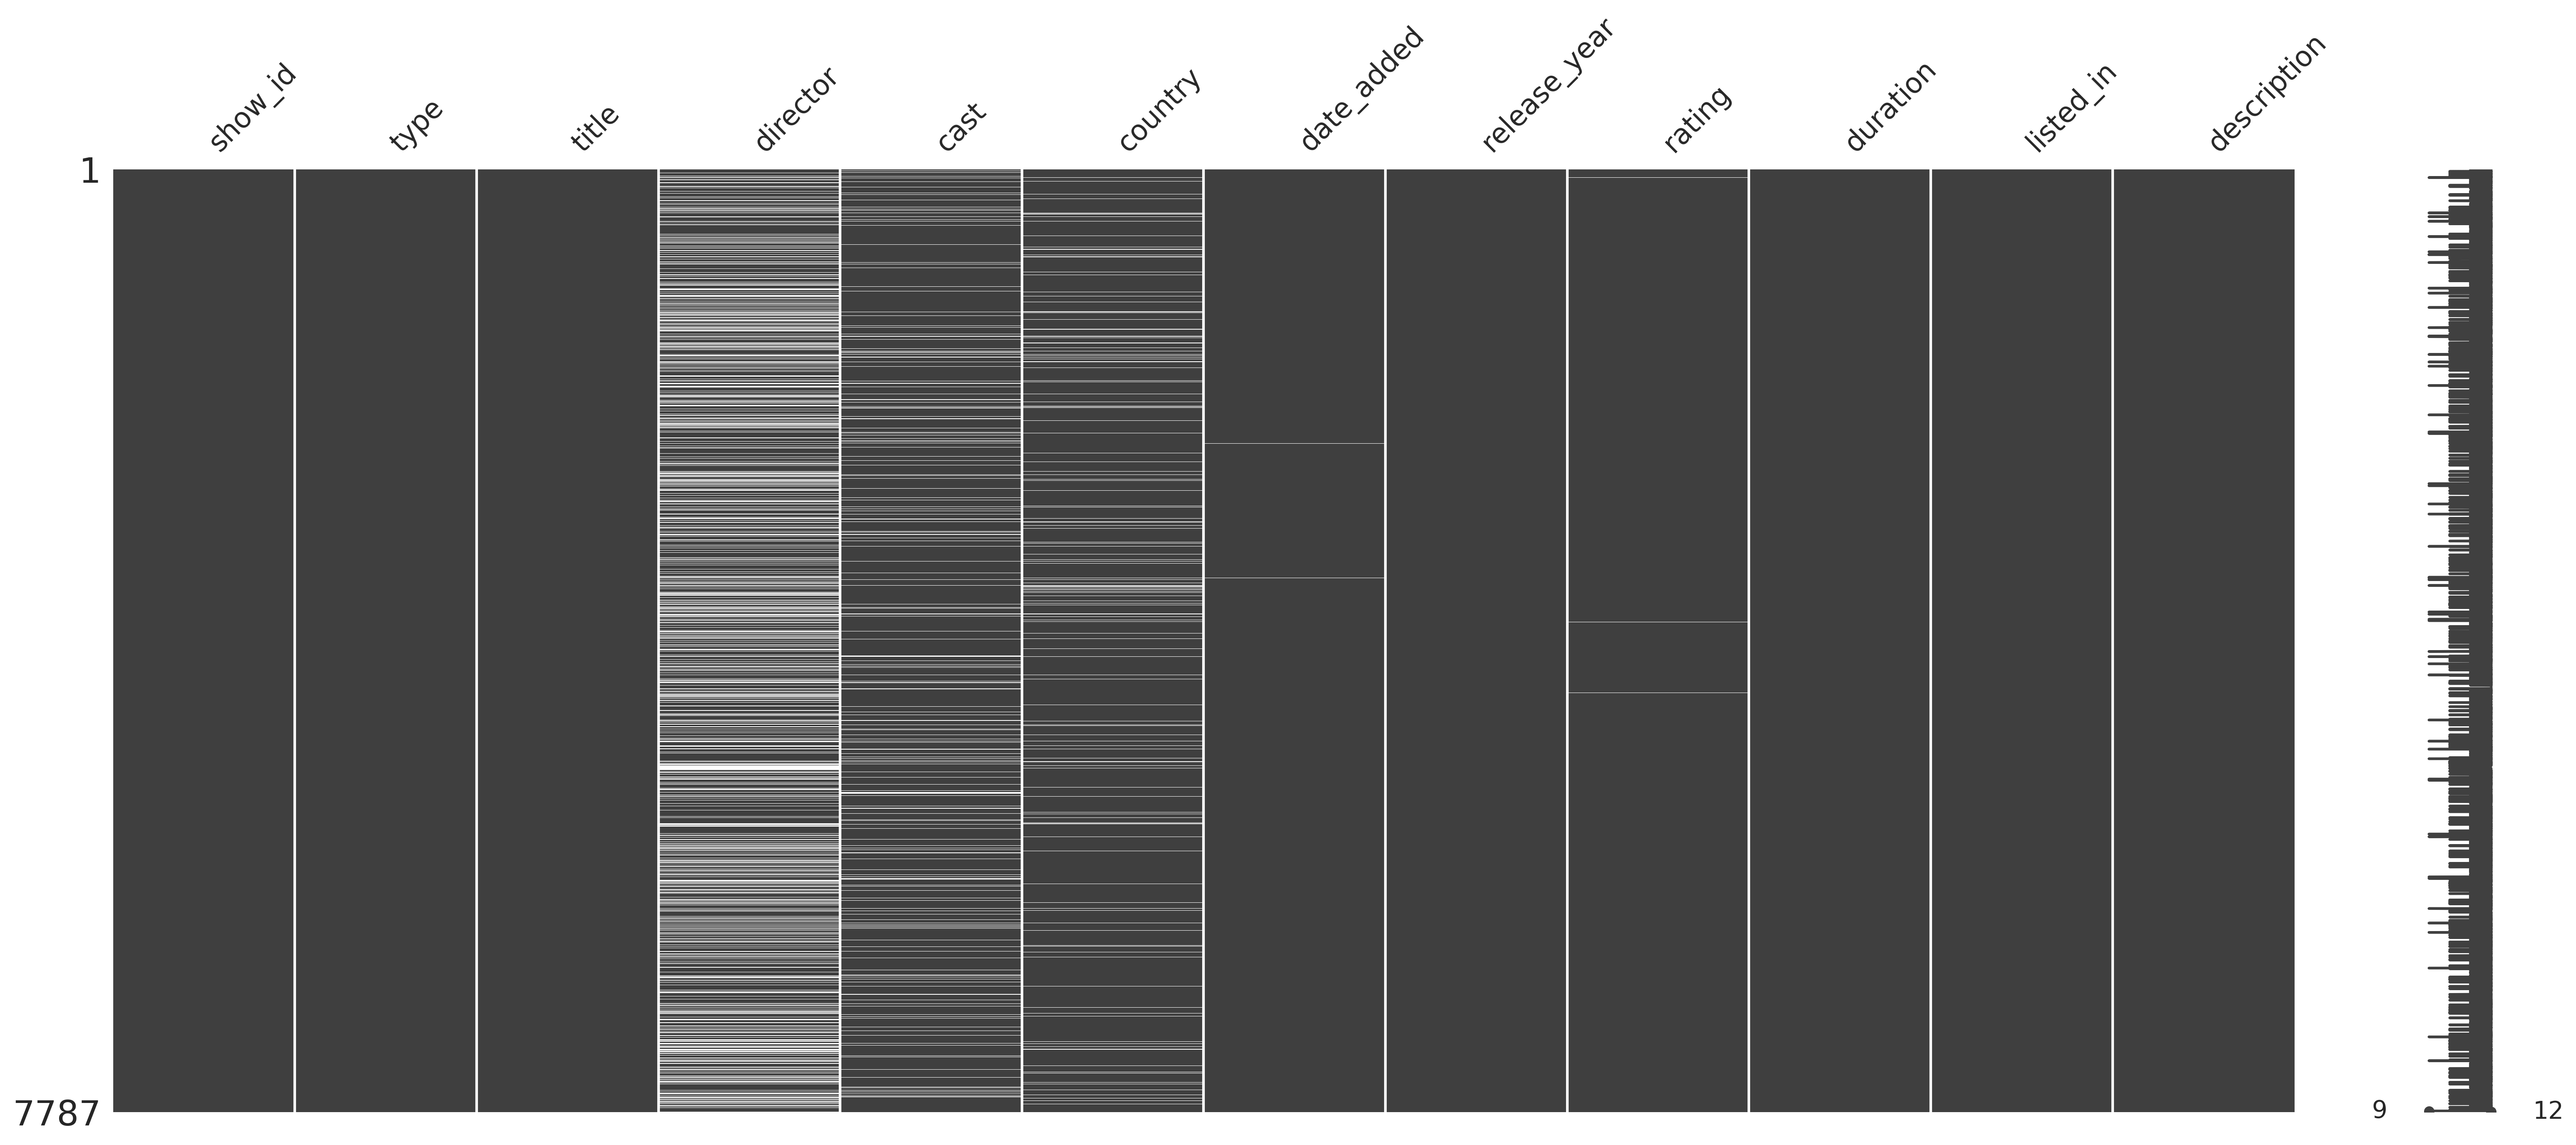

In [12]:
msno.matrix(data)
plt.show()

In [13]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

director's null rate : 30.679337357133683%
cast's null rate : 9.220495697958135%
country's null rate : 6.51085141903172%
date_added's null rate : 0.1284191601386927%
rating's null rate : 0.08989341209708489%


There are 7787 titles, and each of them has 12 features.

`director`, `cast`, `country`

These 3 elements have a lot of null data.

- `director` : Only the director who has taken the most work seems to be able to visualize it separately.
- `cast` may be assumed to be zero if converted to number of people.
- `country` also seems to be classified as none.

---

Let's take a closer look at the data.

In [14]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Let's also take a quick look at the unique count and frequency.

In [15]:
data.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.0,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s2649,Movie,Shikari,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3


First of all, `show_id` and `descroption` do not seem to have anything to visualize right now. 

With `show id`, you can EDA the characteristics of the show id and the elements of the movie.
The `description` may be visualized by country differences, year differences or word clouds.


In [16]:
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

For analysis, make `movie` data & `TV Show` data.

In [17]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

## Why Netflix's Video Count Soared?

It is clear that Netflix is ​​now the largest company in the field of film / drama.

This time, let's take a look at how Netflix grew and how it looks like data. With *data from the wiki*

- [Neflix(wiki)](https://en.wikipedia.org/wiki/Netflix)
- [Timeline of Netflix](https://en.wikipedia.org/wiki/Timeline_of_Netflix)

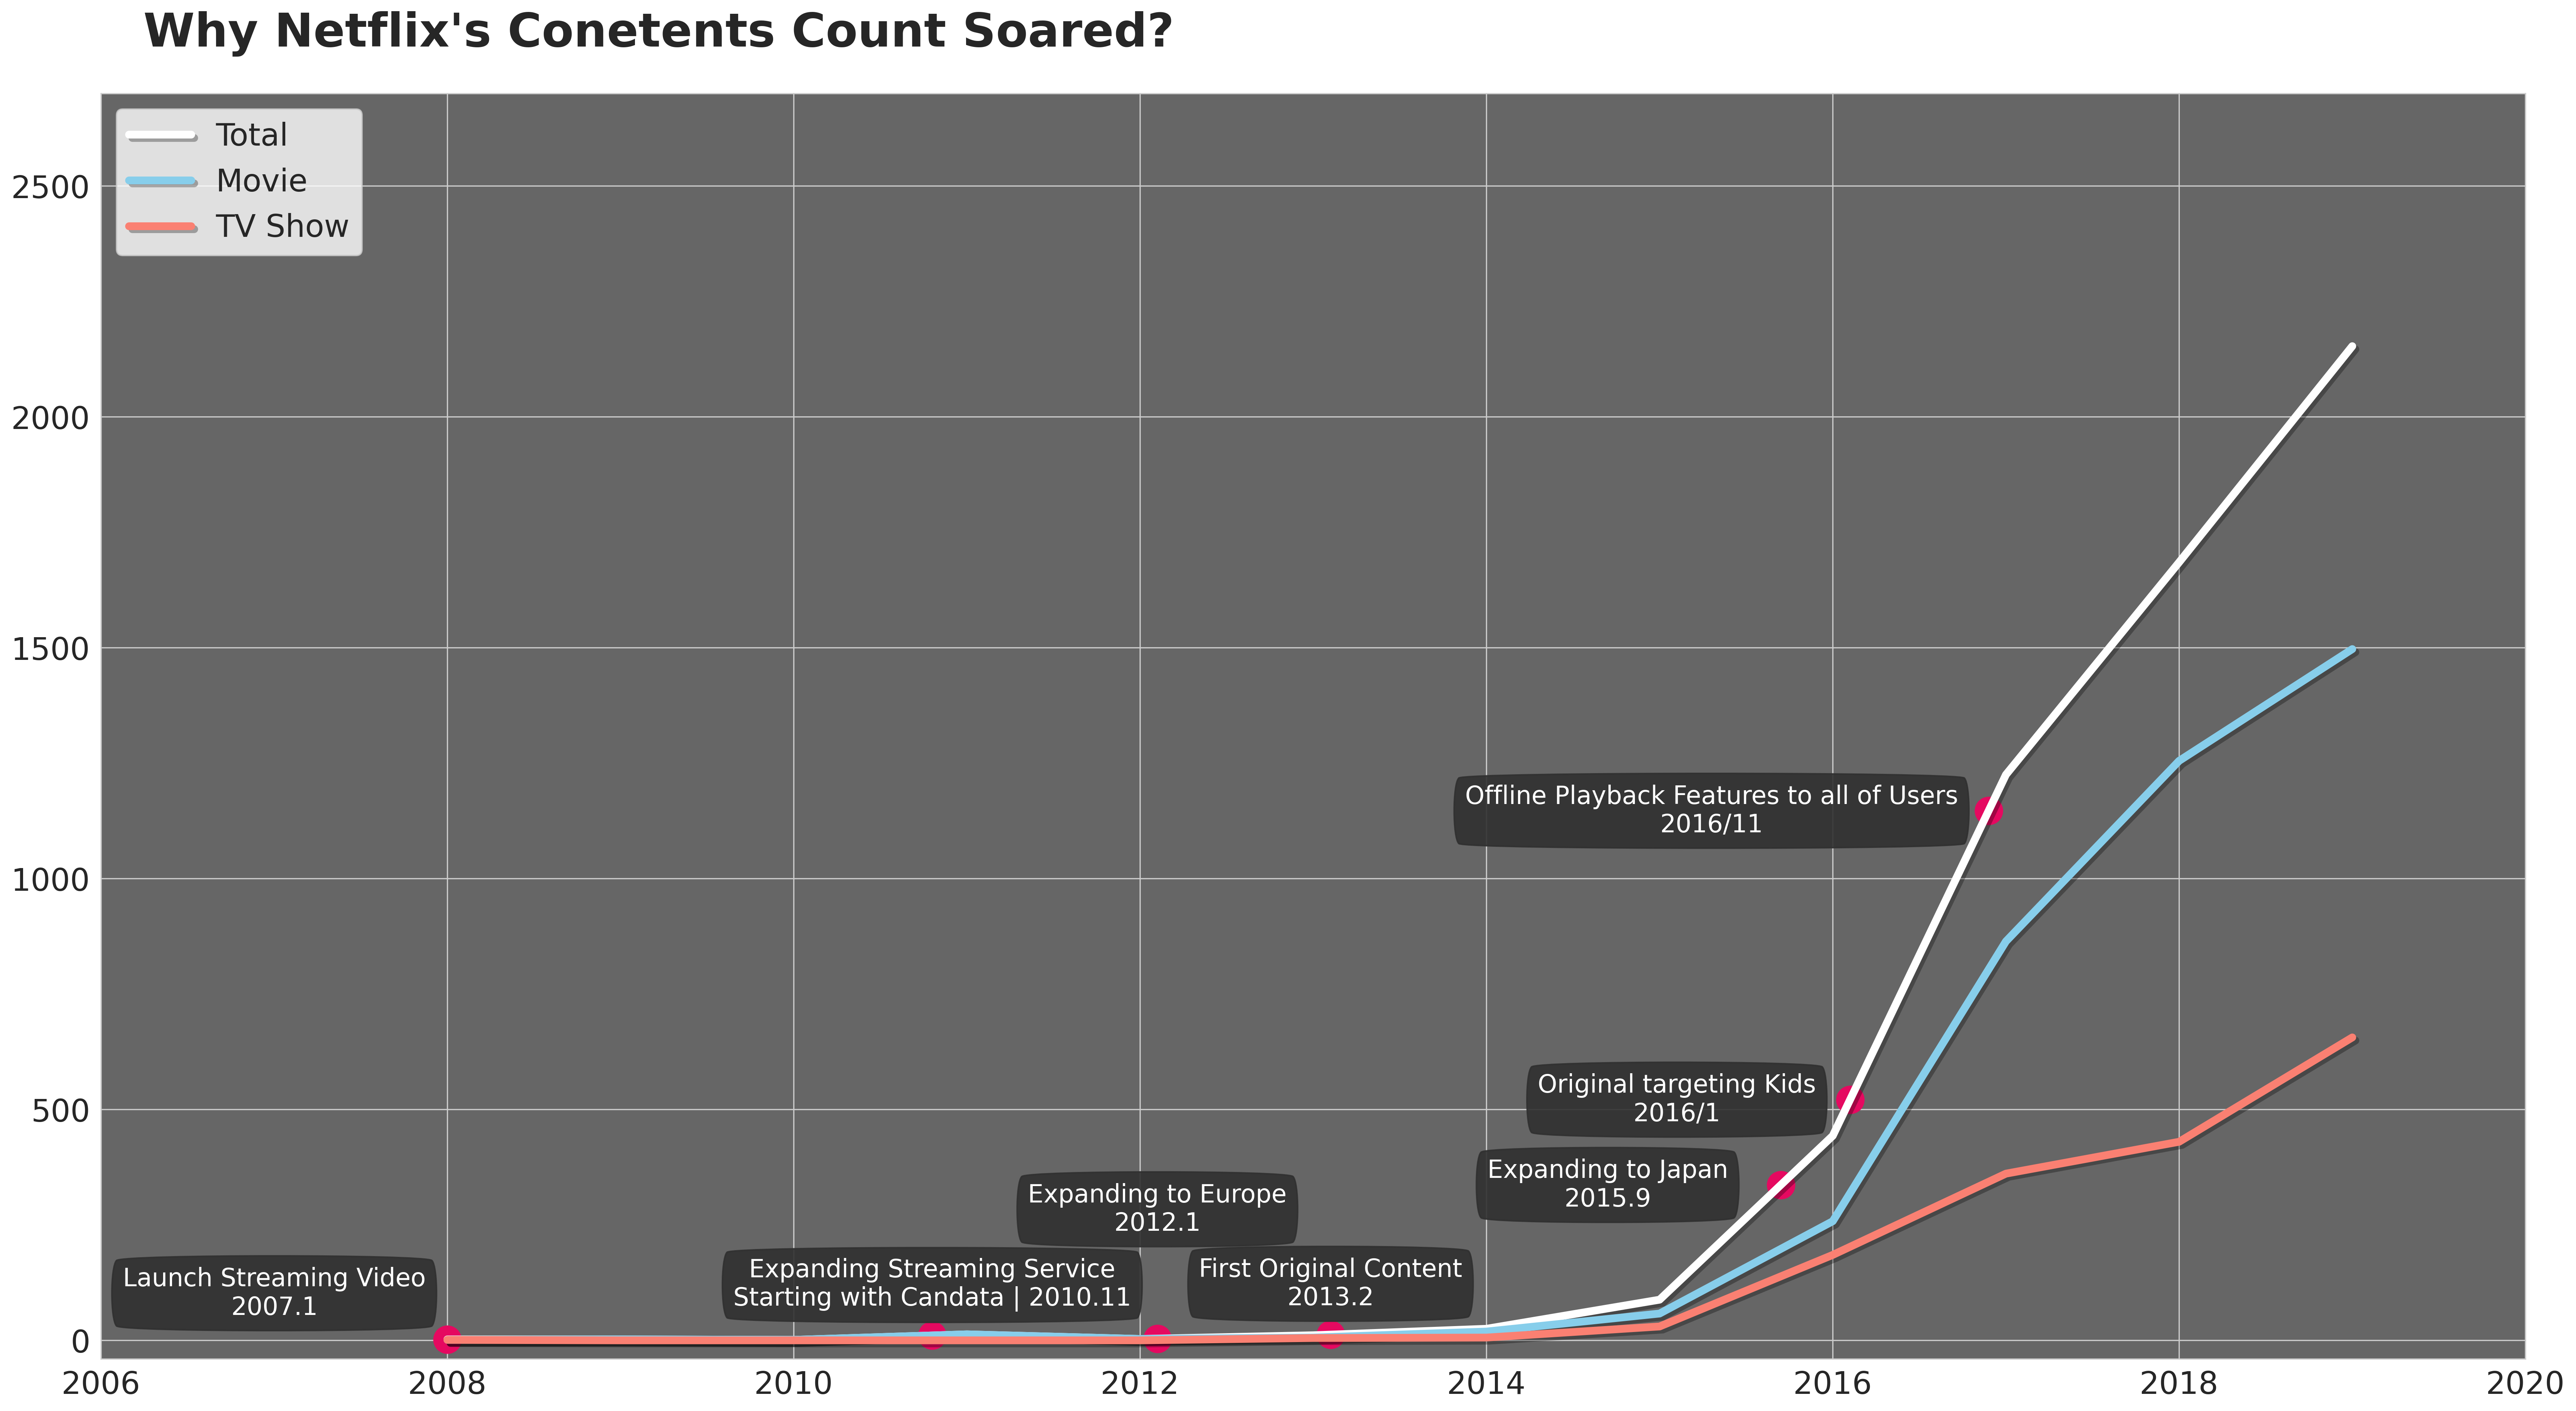

In [18]:
import matplotlib.patheffects as path_effects
year_data = data['year_added'].value_counts().sort_index().loc[:2019]
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [ 
    100,
    110,
    280,
    110,
    0,
    0,
    0
]

left_right = [
    -1,
    -0,
    -0,
    -0,
    -1,
    -1,
    -1.6,
    
]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50960', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Conetents Count Soared?", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

Everyone knows the tremendous growth since the launch of the streaming service.

You can see this growth only by looking at the content of the `data_add`.

Whenever they go overseas, they have added the country's content to Netflix and can assume that the content continues to be produced with positive feedback.

---

And the number of movies decreases, the TV show increases, and you can see that each number is reversed.

Now let's take a look at which country produces such a movie or TV show.

## Which country produces the most Contents?

Now it would be nice to compare them by country.

We need to count the countries, but first I need to preprocess the data inside the `country` columns.

And this time, let's see how we can represent the graph of this comparison.

In [19]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

> Let's count on the other side for a moment, and using the **[Pareto principle(80/20 rule)](https://en.wikipedia.org/wiki/Pareto_principle)** can help you visualize your data.

In [20]:
tot = sum(country_counting)
top20 = sum(country_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 9067
top 20 countries : 7879
percentage : 7879/9067 = 86.8975405315981


So this time, let's visualize only the top 20 countries.

### Bar Plot & Pie Plot

Bar graphs are the most powerful tool.

It can be eaten now, but the history is not so long and it is said to have been made around the 18th century. And it was one of the best technologies at that time. ([wiki](https://en.wikipedia.org/wiki/Bar_chart))

In [21]:
top20_country = country_counting[:20]

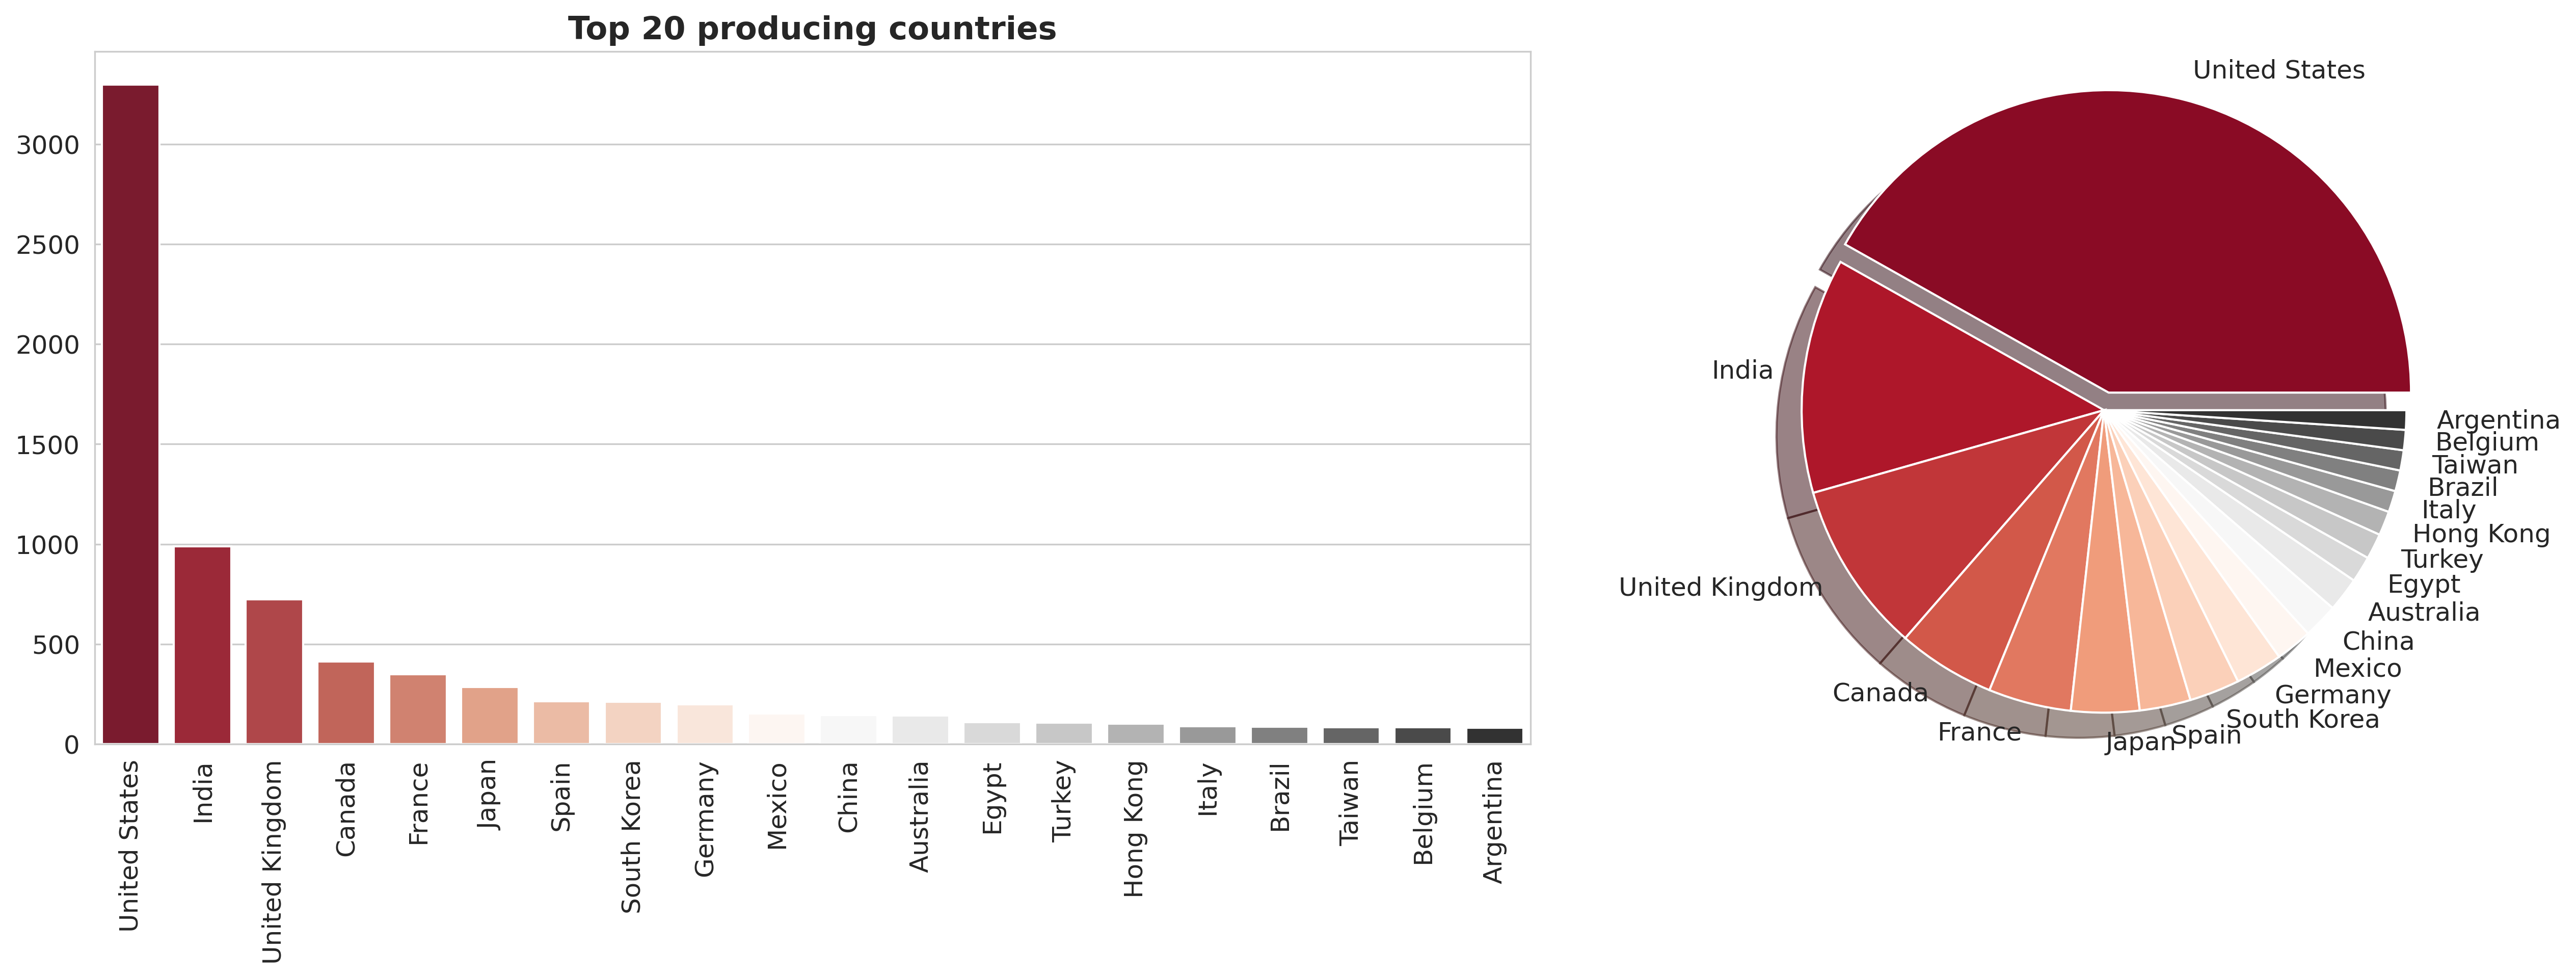

In [22]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

In [23]:
!pip install squarify

Clearly, you can see that the US is close to 40%.

### TreeMap | Waffle (Mosaic plot)

One of the visualization algorithms from the 1990s. While mosaic plots are among the most basic tiling algorithms, there are no visualizations based on python.

Treemaps are better suited for structural tree data, but they can also be used for large comparisons.

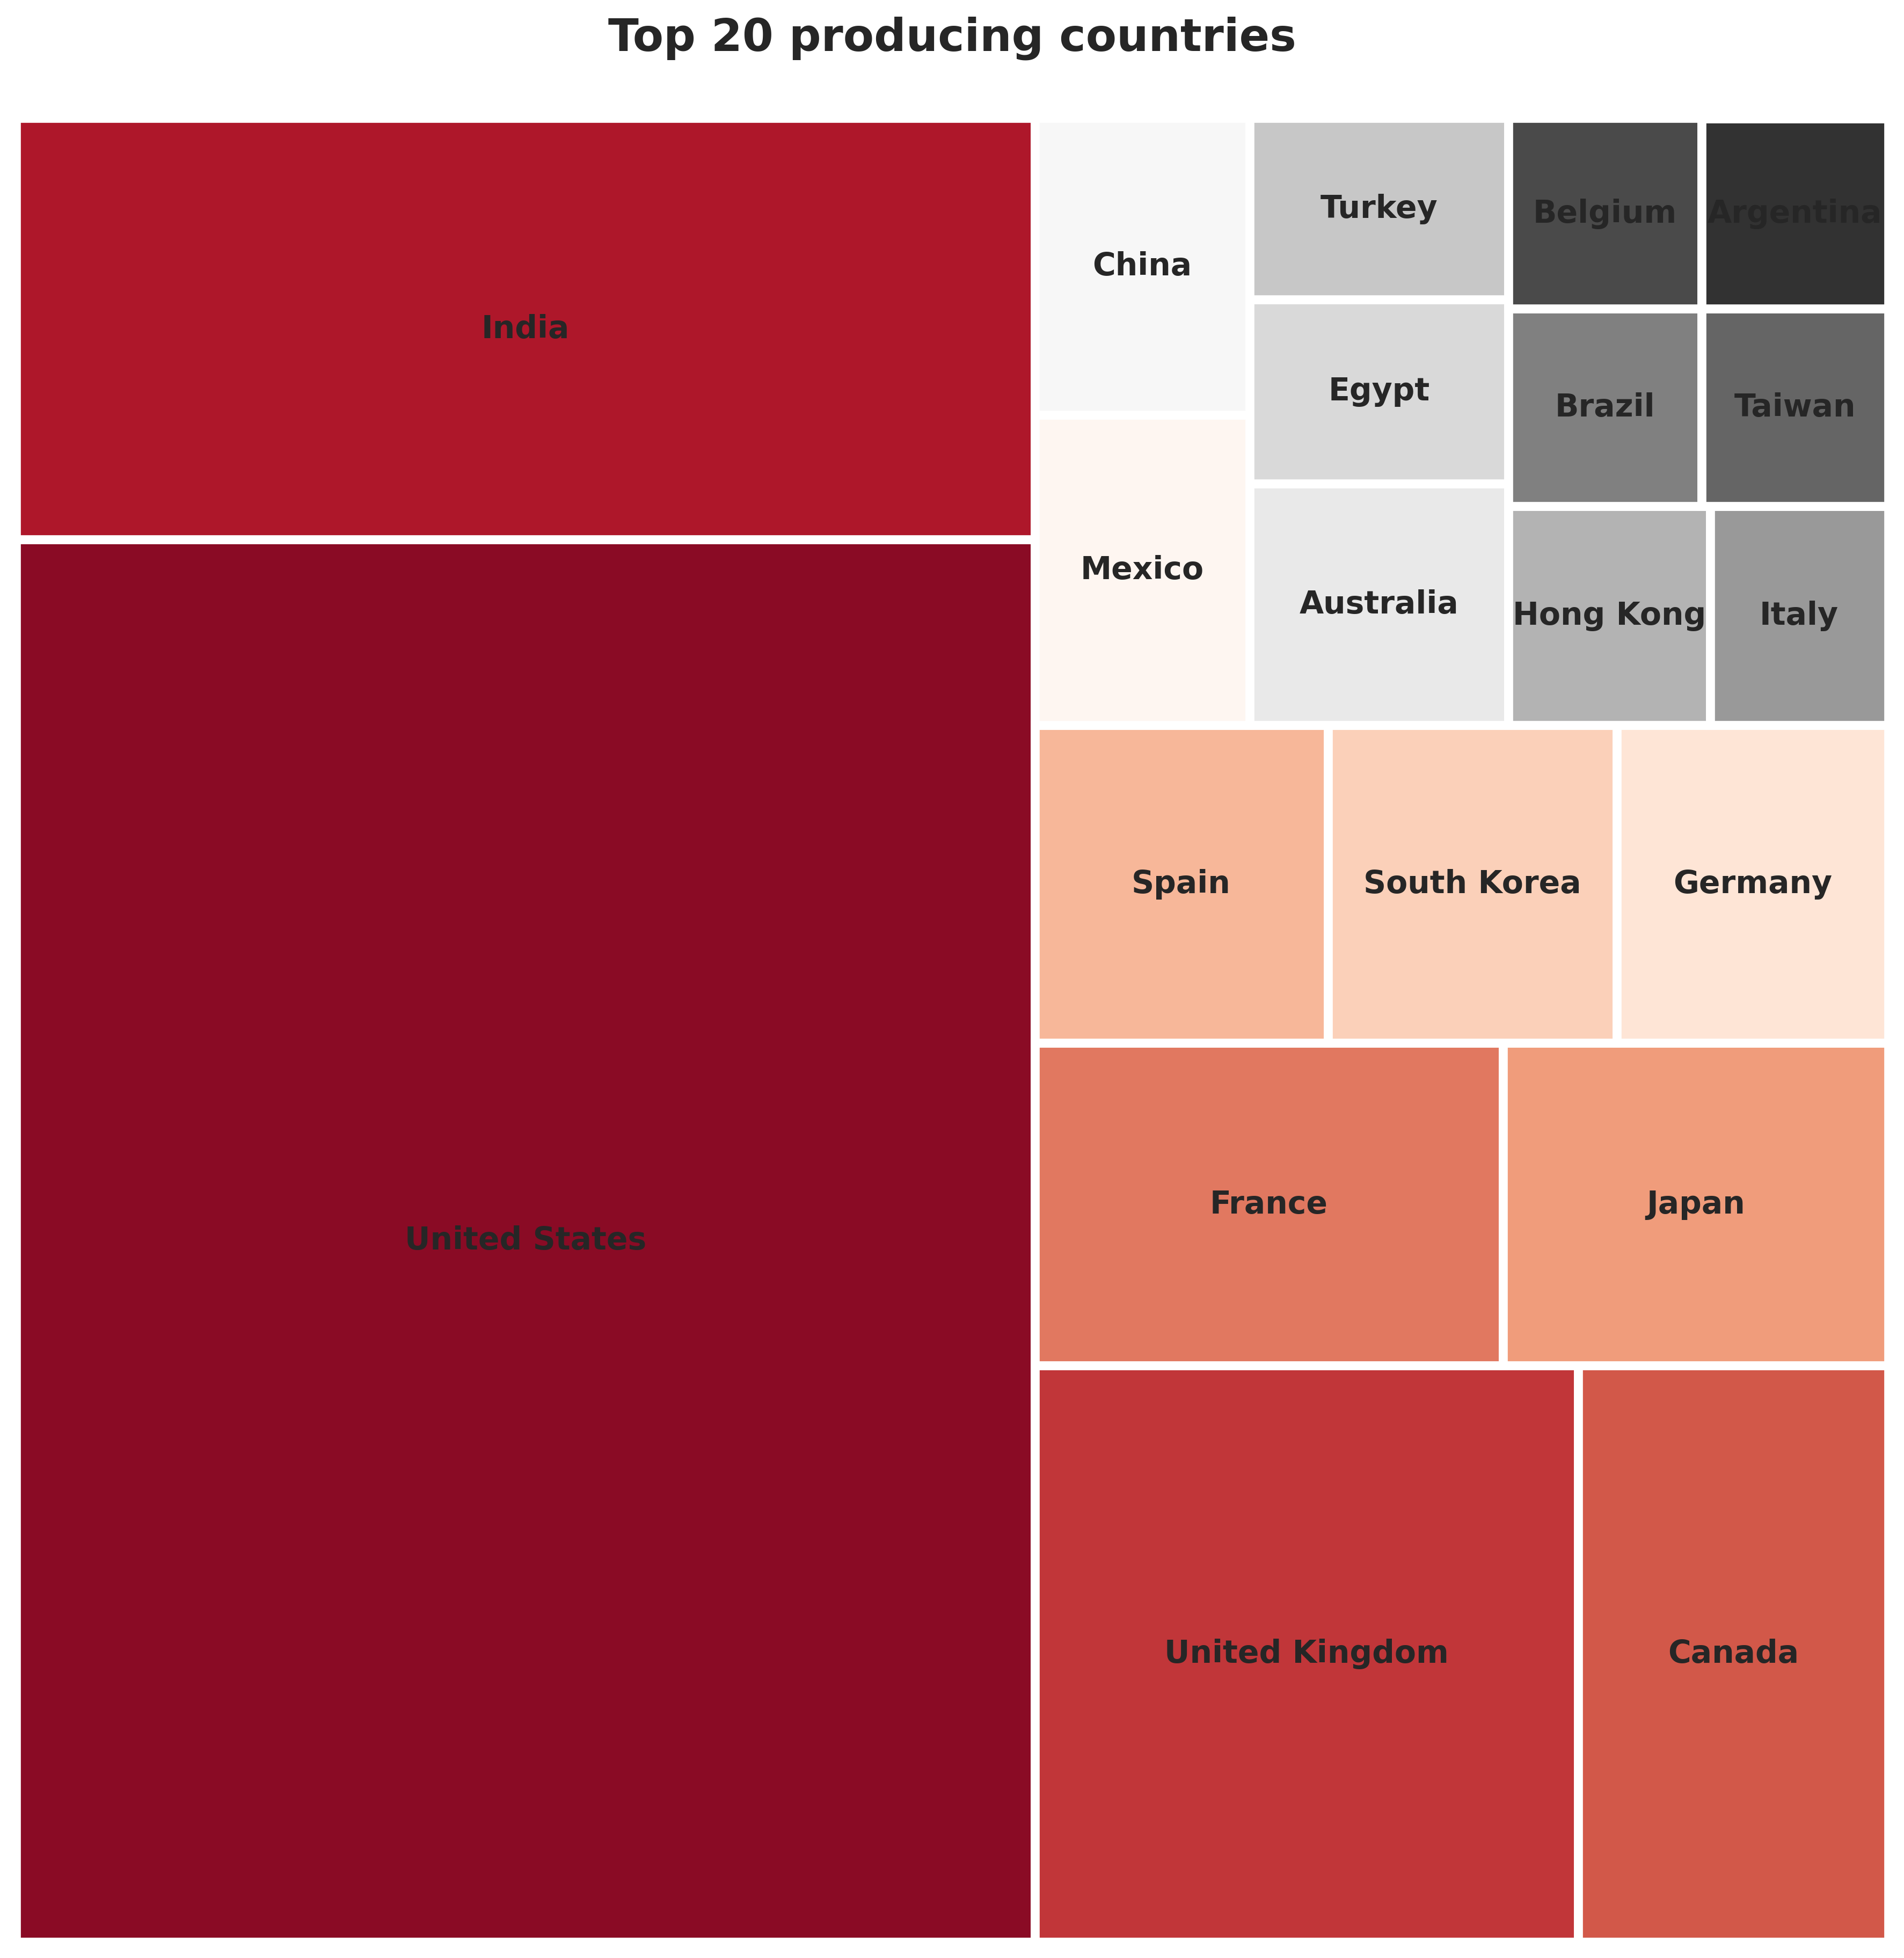

In [24]:
import squarify

y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("RdGy", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

Clearly, the United States is the beginning, and as a content powerhouse, it accounts for 40% of the top 20.

Canada is at the top of the list as it spread through Canada.

China is probably banned, or know that it is developing and using its own app, so the number itself is very small.

Probably, if you draw a rough graph of country population, you'll get a more meaningful graph.

---

If you want to draw something similar to a mosaic graph, it is recommended to draw a waffle chart. The graph is shown below.

In [25]:
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 532kB 7.5MB/s 


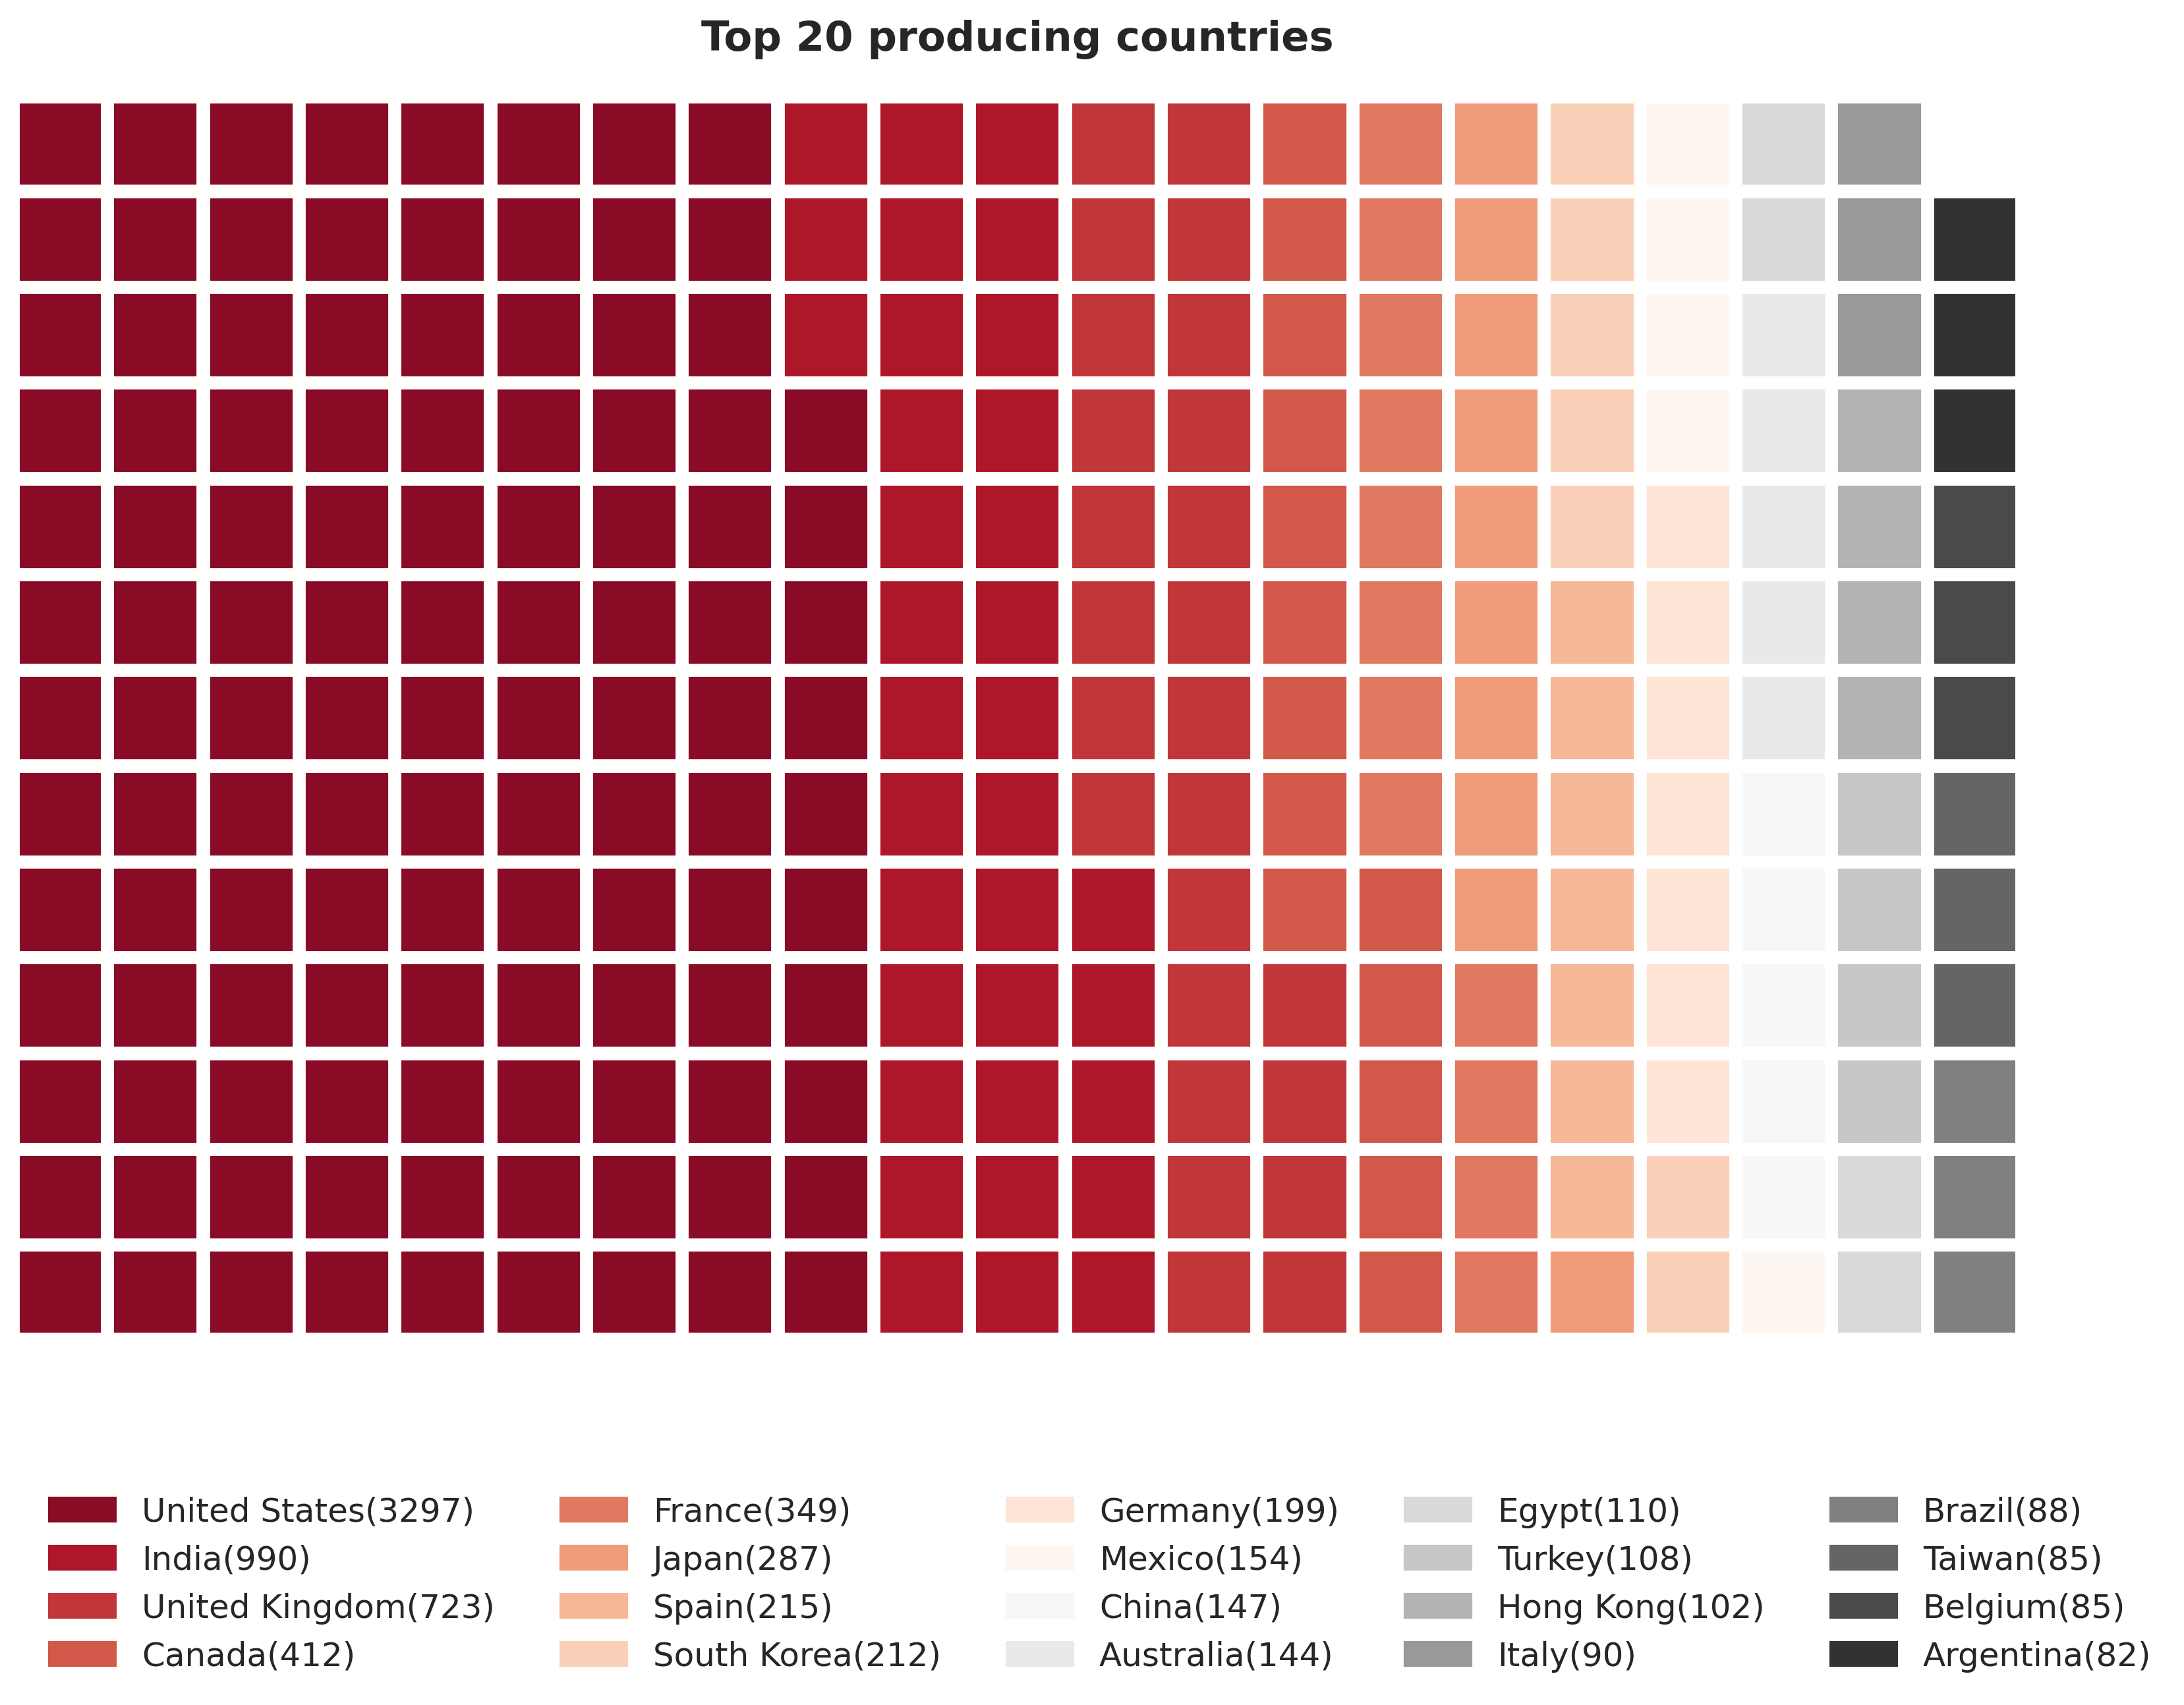

In [26]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    colors=sns.color_palette("RdGy", n_colors=20),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(y)//4,  'framealpha': 0},
    font_size=15, 
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold')
plt.show()

Matched colors for consistency with the previous content. 

> (It was 80/20 from above, but in fact, the ratio of red seems to be 90/10.)

However, it is important to be able to distinguish colors differently because they are not distinguishable.

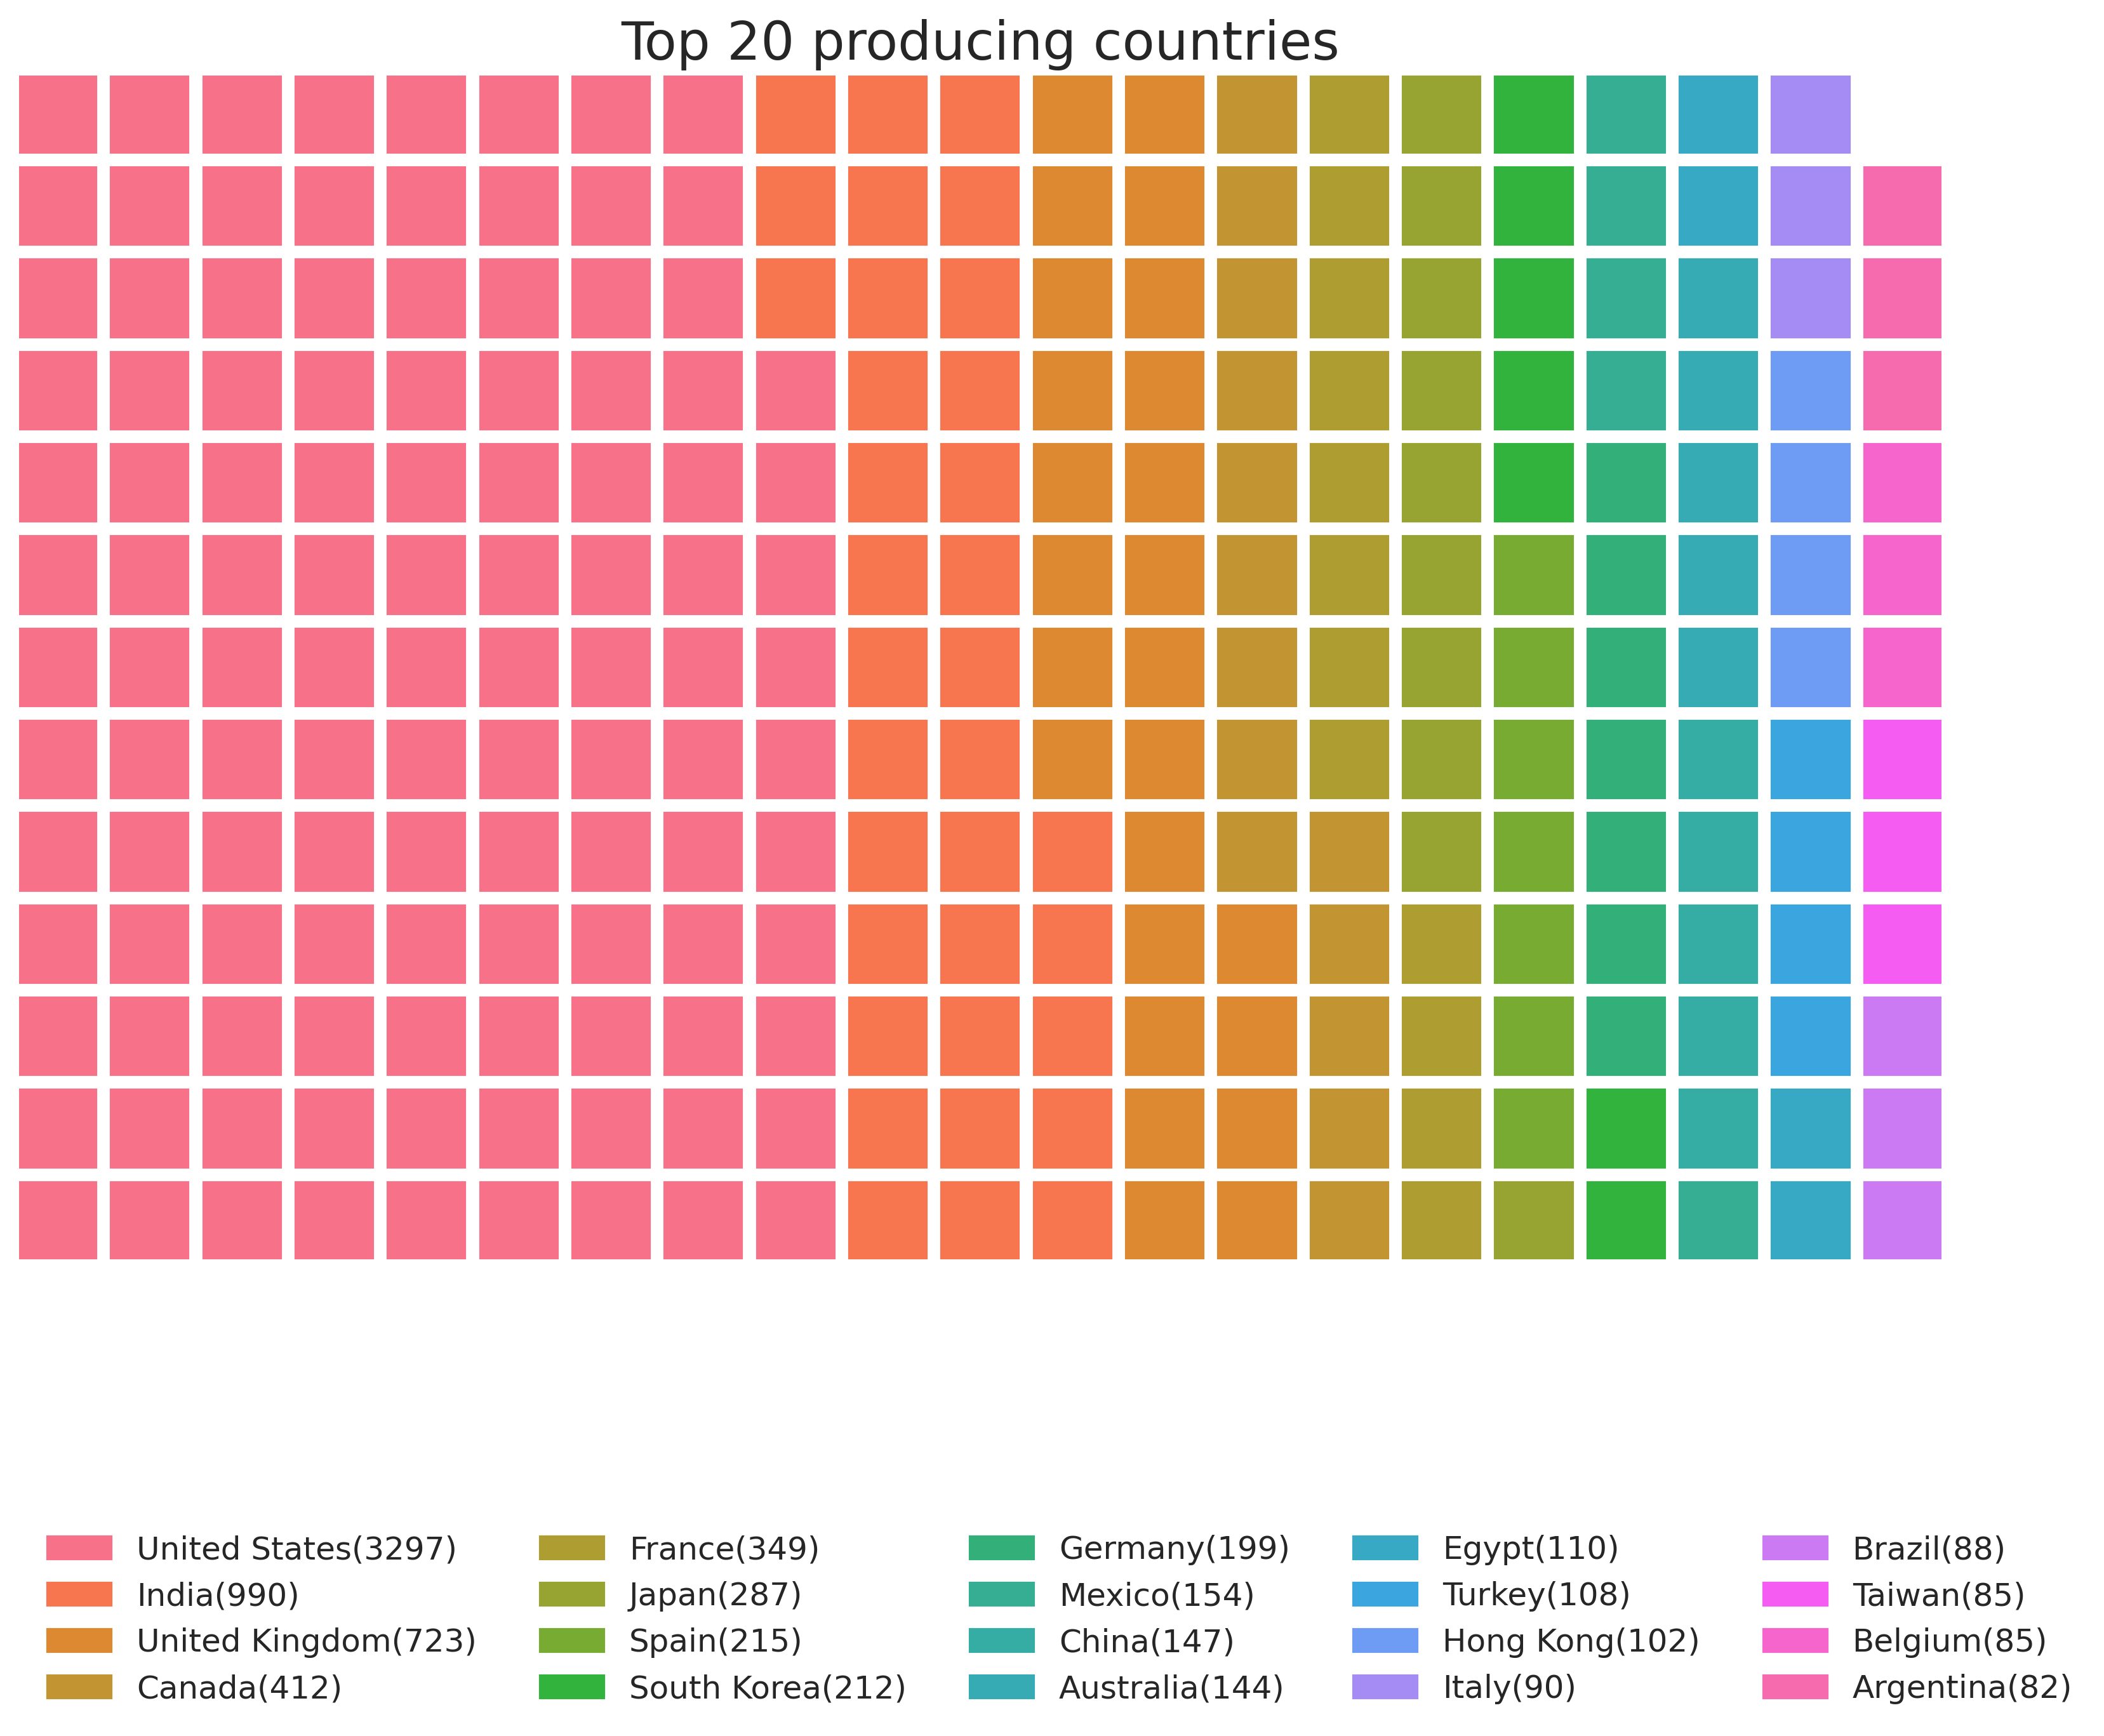

In [27]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    colors=sns.color_palette("husl", n_colors=20),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(y)//4,  'framealpha': 0},
    font_size=20, 
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Top 20 producing countries', fontsize = 20)
plt.show()

## Comparison by country for time

For a more interesting visualization, let's consider the `year` by `country` feature.

In [28]:
import altair as alt
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [29]:
data['country'] = data['country'].dropna().apply(lambda x : x.replace(' ,',',').replace(', ',',').split(','))
lst_col = 'country'
data2 = pd.DataFrame({
      col :  np.repeat(data[col].values, data[lst_col].str.len())
      for col in data.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]

In [30]:
year_country = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]

alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='center', axis=None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

We call this graph a `streamgraph`. It has the advantage of being able to express the overall distribution, but no specific comparison is possible.

It's clearer that it's soared between `2015` and `2016`.

For an accurate comparison, you can compare by percentage and visualize it as follows.

In [31]:
alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='normalize'),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)      
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

Clearly, the **United States, India, and the United Kingdom** have a high percentage of content. (redddddd)

Using the time element, we can also express it on the map as follows:

In [32]:
!pip install plotly.express

In [33]:
import plotly.express as px
year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()

Obviously looking at year_added over time, we can see where the export is going.

## Movie & TV show (Genre)

First, let's check the relationship between each genre by movie and TV show.

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

### Movie Genre Relatation

There are 20 types in the Netflix Movie Dataset


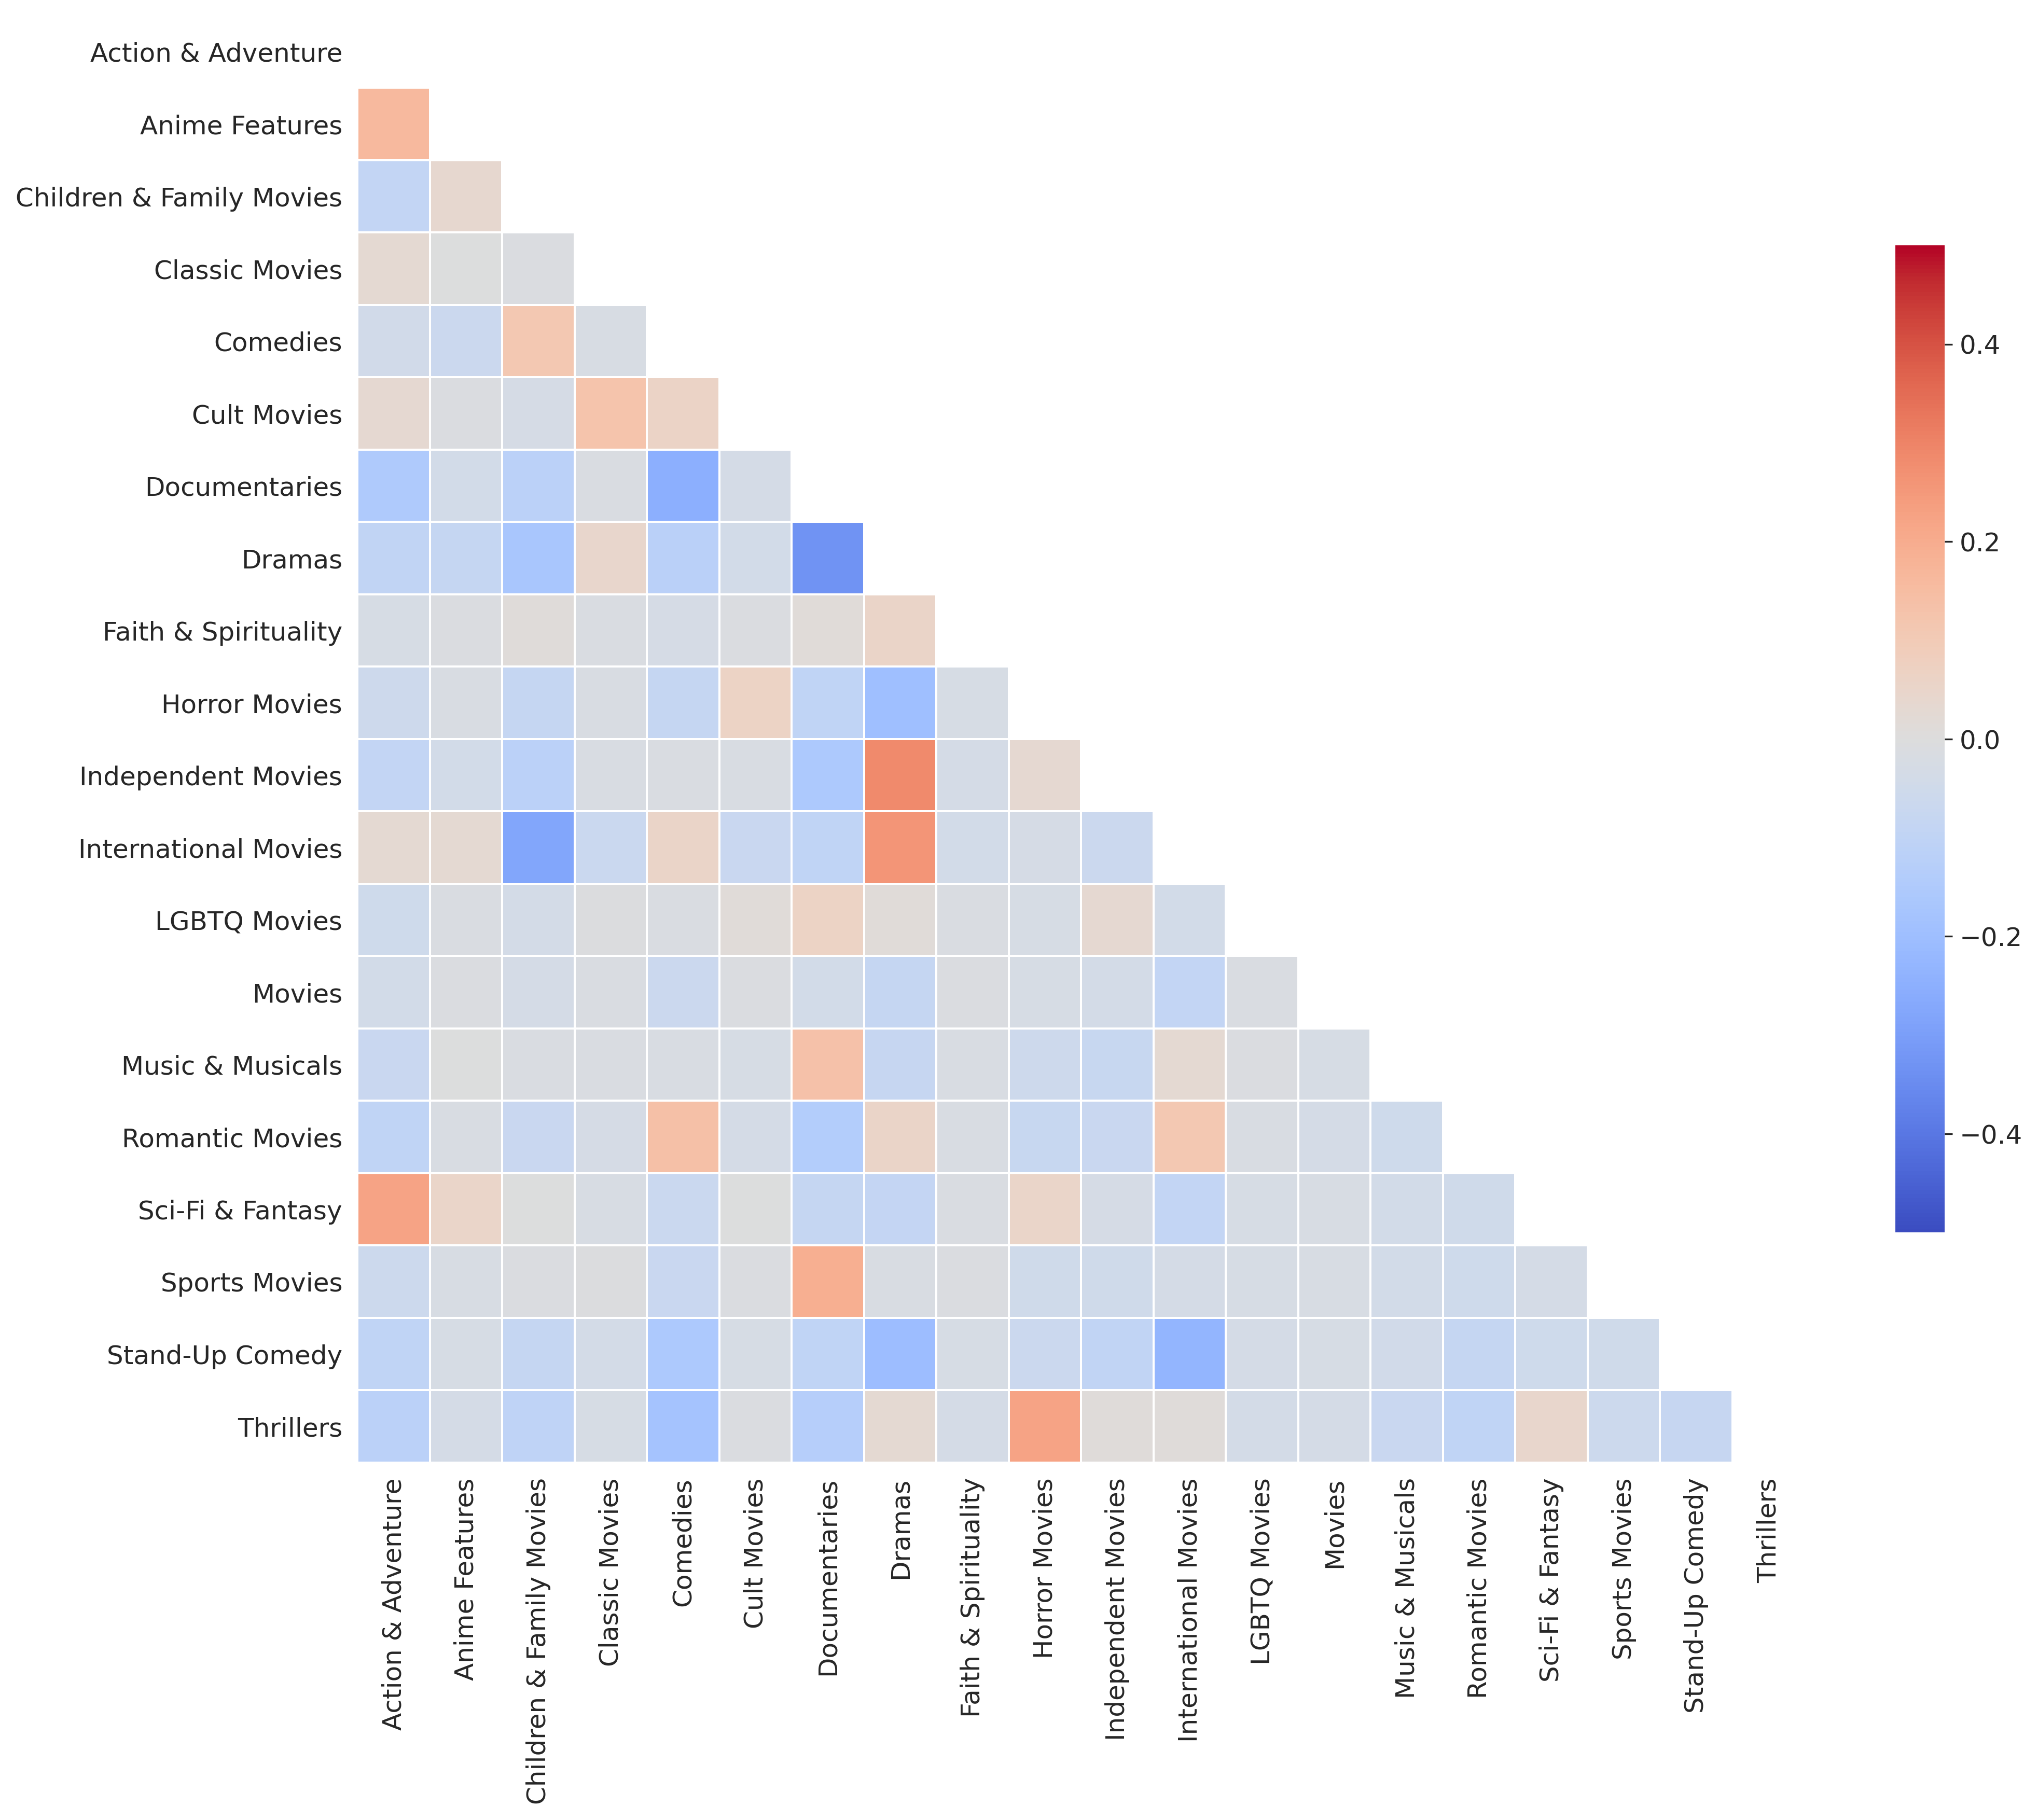

In [35]:
relation_heatmap(movie, 'Movie')

In film, the negative relationship between drama and documentary is remarkable. You can also see that there are many dramas for independent and international films.

### TV Show Genre Relation

There are 22 types in the Netflix TV Show Dataset


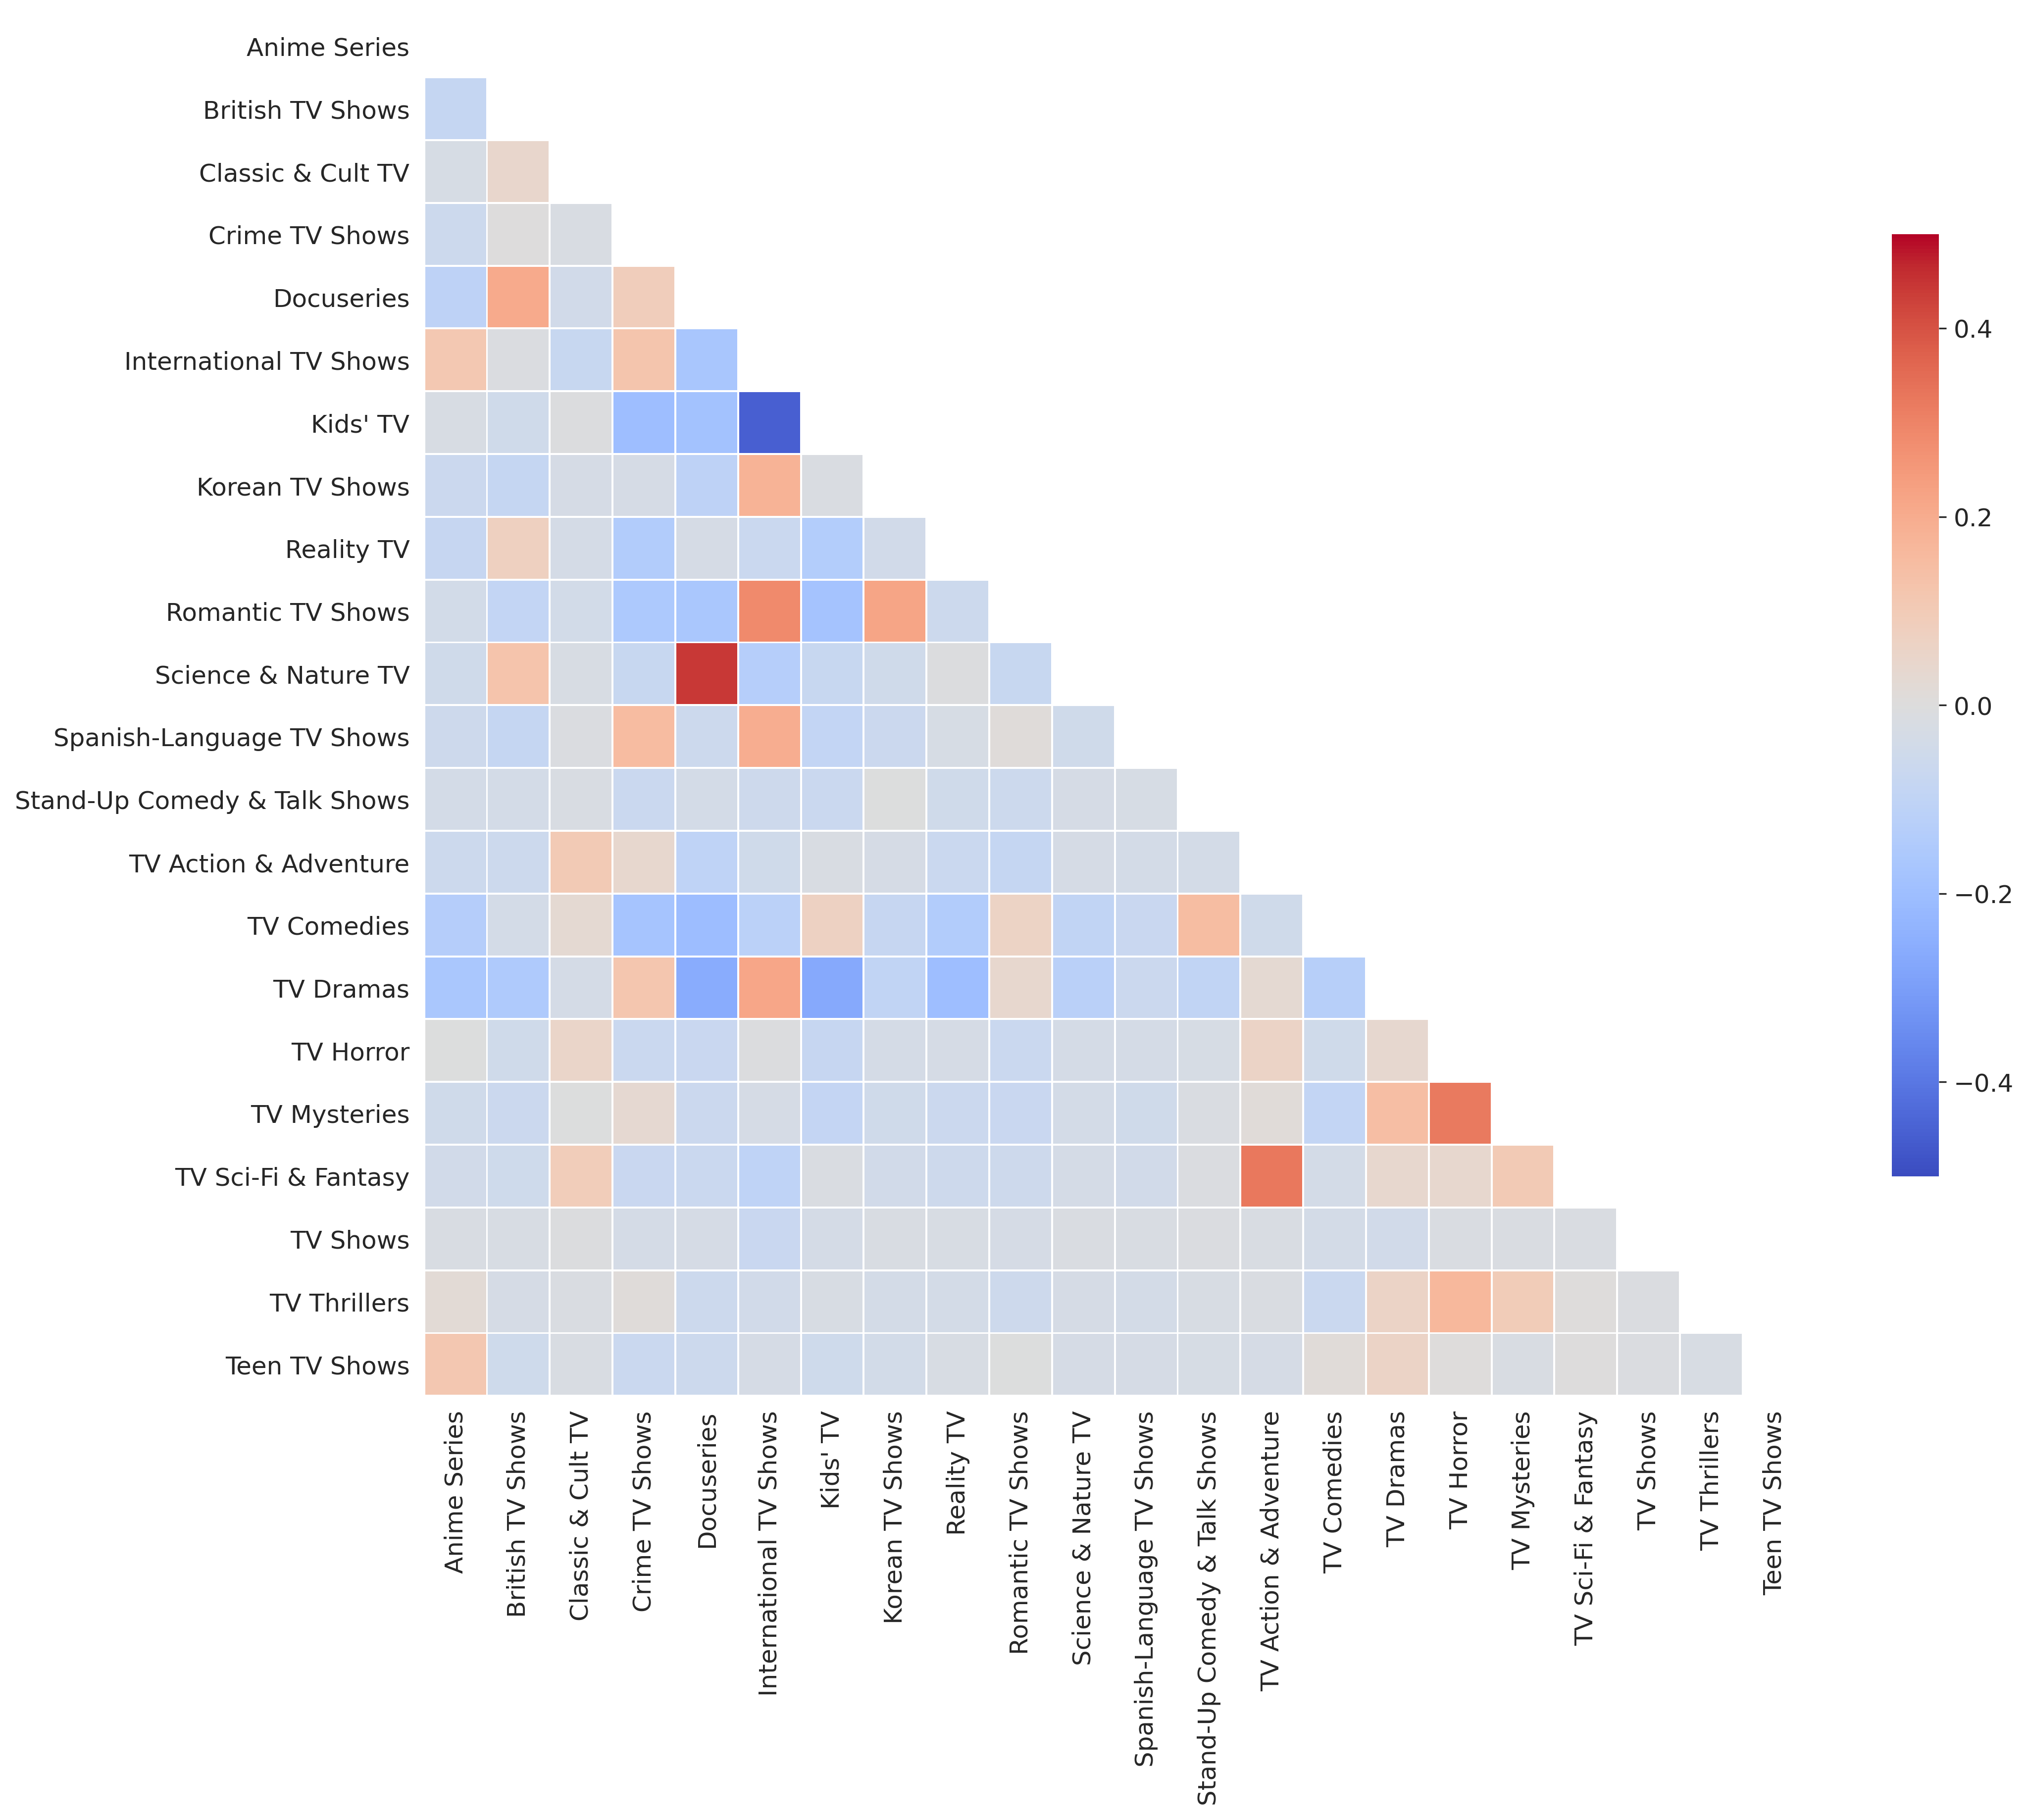

In [36]:
relation_heatmap(tv_show, 'TV Show')

TV shows are more clearly correlated than movies.

The most obvious is the relationship between **kids and International** (*Could it be that kids' content is important to their culture?*), **Science & Natural and Docuseries**. 



## Relation Between Month?

It seems to increase at the end of each month, but in fact it's still increasing, so the picture looks like this:

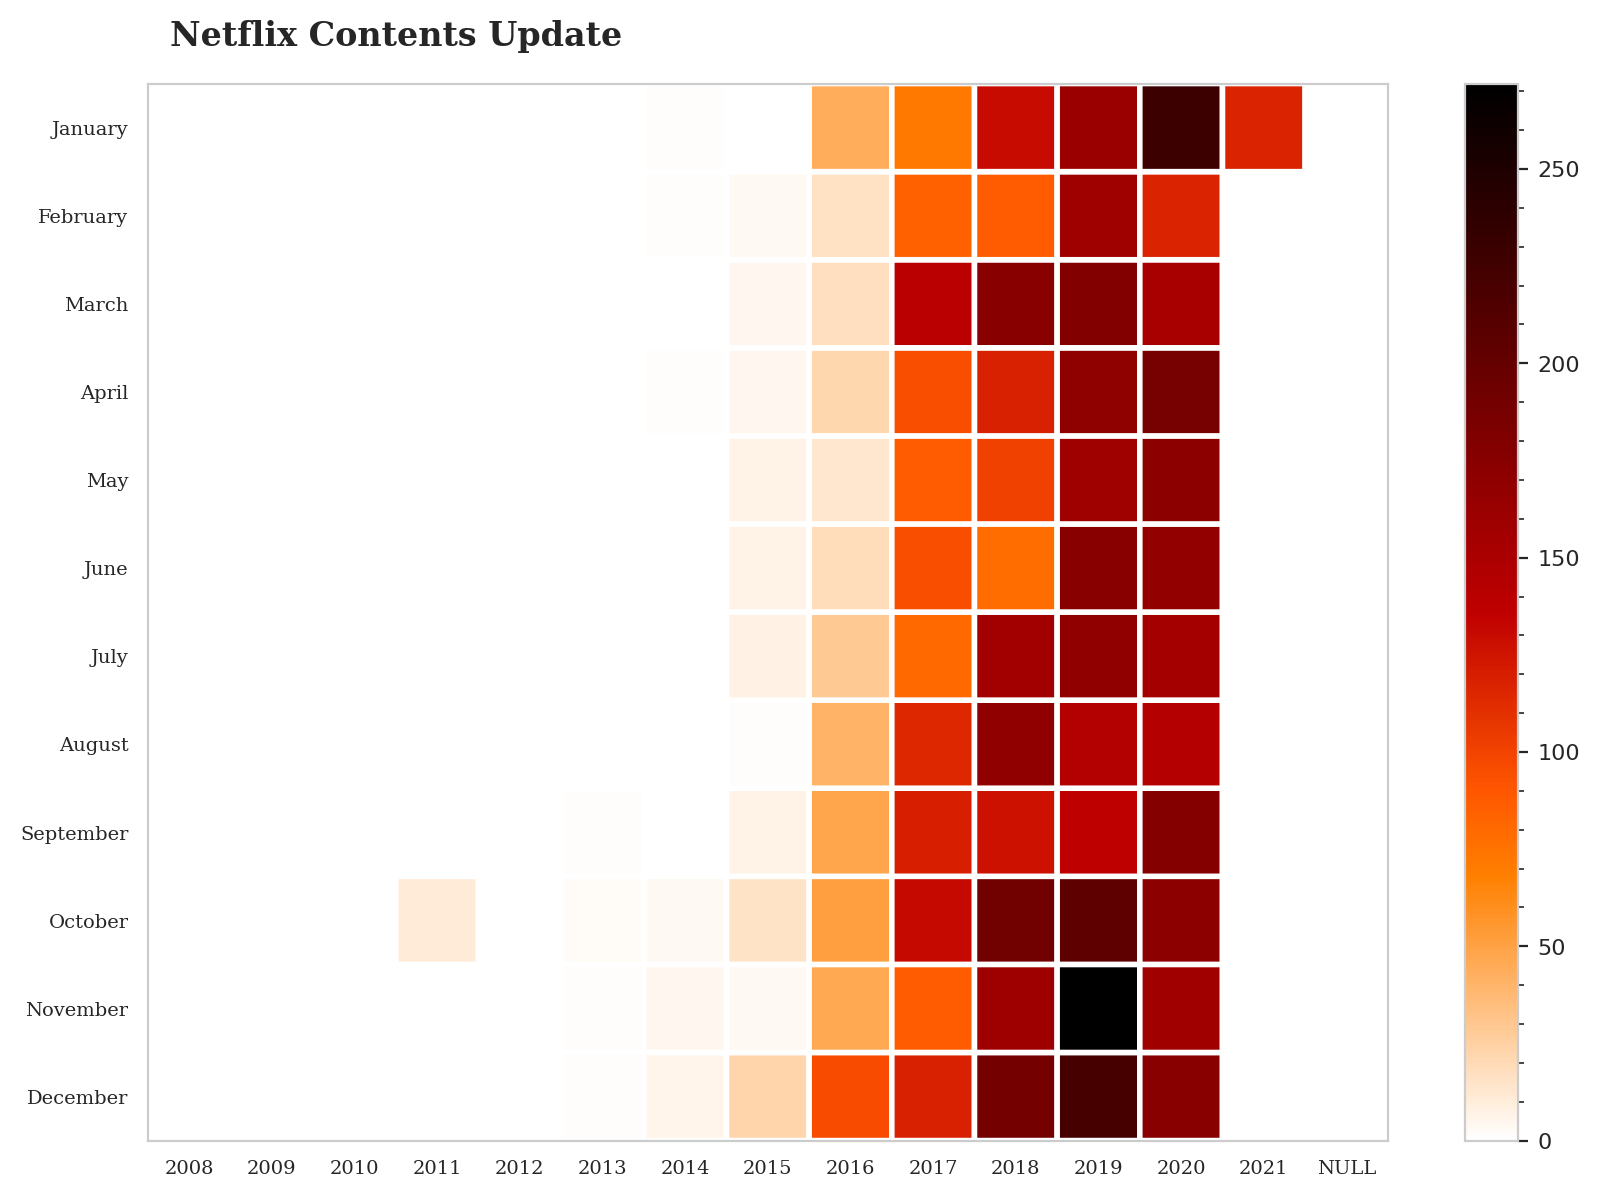

In [50]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In this incremental set, a simple linear graph would be nice. (so this is baaaad visualization & storytelling)